In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(r"bank_transactions_data_2.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


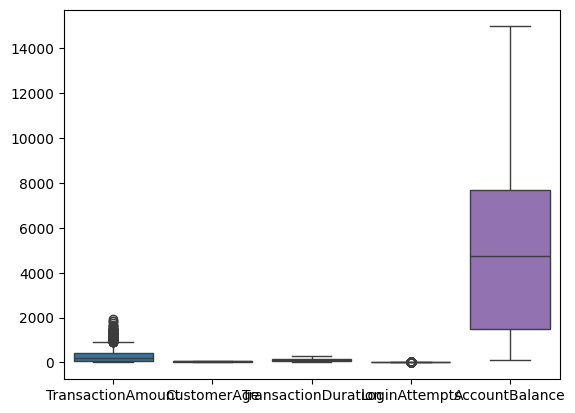

In [6]:
sns.boxplot(data)
plt.show()

In [7]:
data.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39




```
Data prepration
```



In [8]:
data = data.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

In [ ]:
def vectorizer(df):
    vectorizer = TfidfVectorizer()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = vectorizer.fit_transform(df[col]).toarray()
    return df

In [ ]:
data = vectorizer(data)

In [10]:
def normalizer(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    for col in df.columns:
        df[col] = df[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else(lower_bound[col] if x < lower_bound[col] else x))
    return df

In [13]:
data = normalizer(data)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [15]:
X = data

Building Model

In [16]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X)

ValueError: could not convert string to float: '2023-04-11 16:29:14'

In [ ]:
y_pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Visulaization

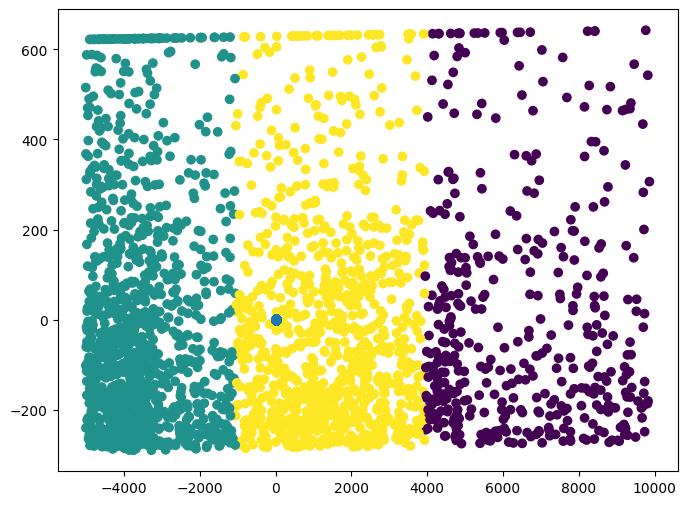

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(y_pred,y_pred)
plt.show()

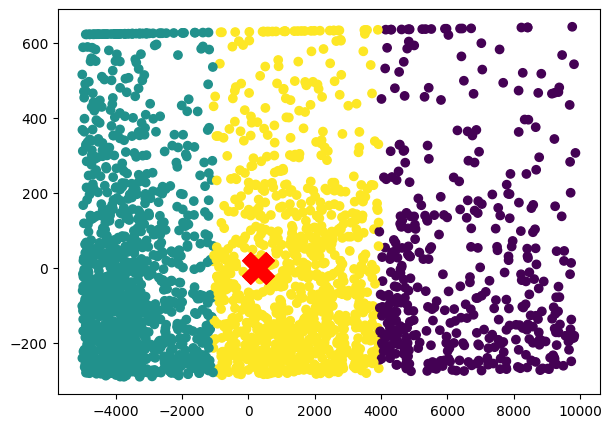

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1], c='red', s=500, marker='X')
plt.show()

In [ ]:
inertia = []
cluster_range = range(1,15)
for k in cluster_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

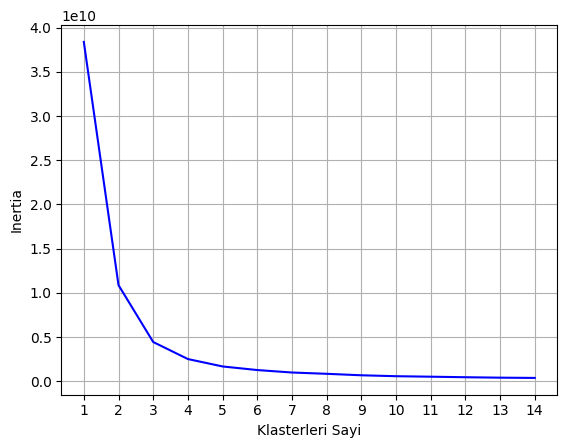

In [ ]:
plt.plot(cluster_range,inertia, linestyle='-', c='blue' )
plt.xlabel('Klasterleri Sayi')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [ ]:
print(f'Inertia:\n{kmeans.inertia_}')

Inertia:
370620196.87373126
